Import Libraries and dataset for EDA on bikepghpublic2017

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# File path of the Excel file
file_path = r"/Users/mattmcmon/Library/CloudStorage/GoogleDrive-mmcmon1990@gmail.com/My Drive/CMU/Software Design for Data Scientists/bikepghpublic2017.csv" #mac
#file_path = r"C:\Users\Matt\Google Drive\CMU\Software Design for Data Scientists\bikepghpublic2017.csv" #windows

In [3]:
# Load the Excel file into a DataFrame
bikepghpublic2017 = pd.read_csv(file_path)

Display sample of dataset

In [4]:
# Display the first few rows of the DataFrame
bikepghpublic2017.head()

,Response ID,Start Date,End Date,Status,Source Type,InteractPedestrian,InteractBicycle,CircumstancesCoded,FeelingsProvingGround,SafetyHuman,...,AVSafetyPotential,RegulationTesting,RegulationSpeed,RegulationSchoolZone,RegulationShareData,AdvocacyIssues,BikePghPosition,PayingAttentionAV,FamiliarityTechnoology,ZipCode
0,260279884,02/22/2017 10:38:27 AM PST,02/22/2017 10:46:22 AM PST,COMPLETE,Survey Link,No,Yes,9.0,Approve,2,...,Yes,Yes,Not sure,Not sure,Yes,Disagree,Neither Support nor Oppose,To some extent,Mostly Unfamiliar,15203.0
1,260293425,02/22/2017 5:59:59 PM PST,02/22/2017 6:04:04 PM PST,COMPLETE,Survey Link,Yes,Yes,9.0,Disapprove,2,...,No,No,No,No,No,Neutral,Actively Oppose,To a moderate extent,Somewhat familiar,15201.0
2,260293589,02/22/2017 6:06:17 PM PST,02/22/2017 6:15:05 PM PST,COMPLETE,Survey Link,No,Yes,9.0,Disapprove,2,...,Not sure,Yes,Not sure,Yes,Not sure,Neutral,Neither Support nor Oppose,To little extent,Somewhat familiar,15222.0
3,260299834,02/22/2017 10:56:42 PM PST,02/22/2017 11:03:27 PM PST,COMPLETE,Survey Link,No,No,9.0,Neutral,2,...,Yes,Yes,Yes,No,Yes,Disagree,Neither Support nor Oppose,To a moderate extent,Somewhat familiar,15106.0
4,260335956,02/23/2017 11:20:08 AM PST,02/23/2017 11:22:05 AM PST,COMPLETE,Survey Link,No,Yes,9.0,Somewhat Approve,4,...,Maybe,Yes,Yes,No,Not sure,Disagree,Actively Support,To little extent,Mostly Unfamiliar,15202.0


Display information on the dataset

In [5]:
# Summary statistics of the DataFrame
bikepghpublic2017.describe()

,Response ID,CircumstancesCoded,ZipCode
count,8.130000e+02,403.000000,799.000000
mean,2.605575e+08,2.682382,15440.057572
std,2.715053e+05,1.792289,4127.398184
min,2.602790e+08,1.000000,0.000000
25%,2.603363e+08,2.000000,15206.000000
50%,2.603790e+08,2.000000,15215.000000
75%,2.608905e+08,3.000000,15224.000000
max,2.611574e+08,9.000000,97206.000000


In [6]:
# Information about DataFrame
bikepghpublic2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Response ID             813 non-null    int64  
 1   Start Date              813 non-null    object 
 2   End Date                813 non-null    object 
 3   Status                  813 non-null    object 
 4   Source Type             813 non-null    object 
 5   InteractPedestrian      799 non-null    object 
 6   InteractBicycle         799 non-null    object 
 7   CircumstancesCoded      403 non-null    float64
 8   FeelingsProvingGround   799 non-null    object 
 9   SafetyHuman             799 non-null    object 
 10  SafetyAV                799 non-null    object 
 11  AVSafetyPotential       799 non-null    object 
 12  RegulationTesting       799 non-null    object 
 13  RegulationSpeed         799 non-null    object 
 14  RegulationSchoolZone    799 non-null    ob

In [7]:
# Count the number of missing values in each column
bikepghpublic2017.isnull().sum()

Response ID                 0
Start Date                  0
End Date                    0
Status                      0
Source Type                 0
InteractPedestrian         14
InteractBicycle            14
CircumstancesCoded        410
FeelingsProvingGround      14
SafetyHuman                14
SafetyAV                   14
AVSafetyPotential          14
RegulationTesting          14
RegulationSpeed            14
RegulationSchoolZone       14
RegulationShareData        14
AdvocacyIssues             20
BikePghPosition            14
PayingAttentionAV          14
FamiliarityTechnoology     14
ZipCode                    14
dtype: int64

Check for duplicate fields

In [8]:
if bikepghpublic2017.duplicated().any():
    print('There are duplicates in the bikepghpublic2017 data')
else:
    print('There are NO duplicates in the bikepublic2017 data')

There are NO duplicates in the bikepublic2017 data


Display Data Visualizations

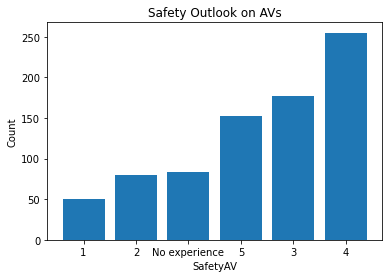

In [9]:
# Display histogram of SafetyAV variable
# Surveyed people rank how safe they feel with AVs (1-very unsafe, 5-very safe)
safetyav_counts = bikepghpublic2017['SafetyAV'].value_counts()
safetyav_sorted_counts = safetyav_counts.sort_values(ascending=True)
plt.bar(safetyav_sorted_counts.index, safetyav_sorted_counts)
plt.xlabel('SafetyAV')
plt.ylabel('Count')
plt.title('Safety Outlook on AVs')
plt.show()

In [10]:
#Displays count of each response under SafetyAV
bikepghpublic2017.groupby('SafetyAV')['SafetyAV'].size()

SafetyAV
1                 50
2                 80
3                177
4                255
5                153
No experience     84
Name: SafetyAV, dtype: int64

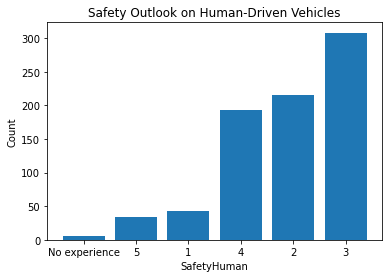

In [11]:
# Display histogram of SafetyHuman variable
# Surveyed people rank how safe they feel with human-driven cars (1-very unsafe, 5-very safe)
safehuman_counts = bikepghpublic2017['SafetyHuman'].value_counts()
safehuman_sorted_counts = safehuman_counts.sort_values(ascending=True)
plt.bar(safehuman_sorted_counts.index, safehuman_sorted_counts)
plt.xlabel('SafetyHuman')
plt.ylabel('Count')
plt.title('Safety Outlook on Human-Driven Vehicles')
plt.show()

In [12]:
#Displays count of each response under SafetyHuman
bikepghpublic2017.groupby('SafetyHuman')['SafetyHuman'].size()

SafetyHuman
1                 43
2                215
3                308
4                193
5                 34
No experience      6
Name: SafetyHuman, dtype: int64

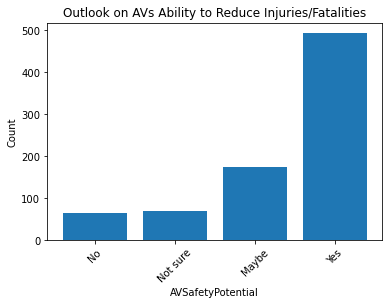

In [13]:
# Display histogram of AVSafetyPotential lvariable
# Shows outlook on whether AVs have the potential to reduce injuries and fatalities
news_counts = bikepghpublic2017['AVSafetyPotential'].value_counts()
news_sorted_counts = news_counts.sort_values(ascending=True)
plt.bar(news_sorted_counts.index, news_sorted_counts)
plt.xticks(rotation=45)
plt.xlabel('AVSafetyPotential')
plt.ylabel('Count')
plt.title('Outlook on AVs Ability to Reduce Injuries/Fatalities')
plt.show()

In [14]:
#Displays count of each response under AVSafetyPotential
bikepghpublic2017.groupby('AVSafetyPotential')['AVSafetyPotential'].size()

AVSafetyPotential
Maybe       174
No           63
Not sure     69
Yes         493
Name: AVSafetyPotential, dtype: int64

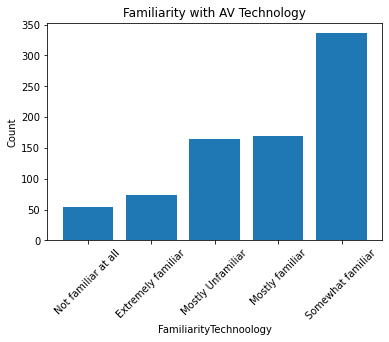

In [15]:
# Display histogram of FamiliarityTechnoology variable
# Surveyed people share to what extent they're familiar with AV technology
tech_counts = bikepghpublic2017['FamiliarityTechnoology'].value_counts()
tech_sorted_counts = tech_counts.sort_values(ascending=True)
plt.bar(tech_sorted_counts.index, tech_sorted_counts)
plt.xticks(rotation=45)
plt.xlabel('FamiliarityTechnoology')
plt.ylabel('Count')
plt.title('Familiarity with AV Technology')
plt.show()

In [16]:
#Displays count of each response under FamiliarityTechnoology
bikepghpublic2017.groupby('FamiliarityTechnoology')['FamiliarityTechnoology'].size()

FamiliarityTechnoology
Extremely familiar      74
Mostly Unfamiliar      165
Mostly familiar        170
Not familiar at all     54
Somewhat familiar      336
Name: FamiliarityTechnoology, dtype: int64

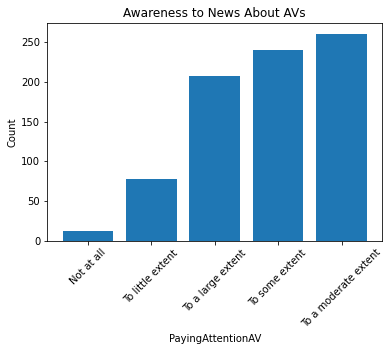

In [17]:
# Display histogram of PayingAttentionAV variable
# Shows to what extent the people surveyed pay attention to news about AVs
news_counts = bikepghpublic2017['PayingAttentionAV'].value_counts()
news_sorted_counts = news_counts.sort_values(ascending=True)
plt.bar(news_sorted_counts.index, news_sorted_counts)
plt.xticks(rotation=45)
plt.xlabel('PayingAttentionAV')
plt.ylabel('Count')
plt.title('Awareness to News About AVs')
plt.show()

In [18]:
#Displays count of each response under PayingAttentionAV
bikepghpublic2017.groupby('PayingAttentionAV')['PayingAttentionAV'].size()

PayingAttentionAV
Not at all               12
To a large extent       208
To a moderate extent    261
To little extent         78
To some extent          240
Name: PayingAttentionAV, dtype: int64

Correlation Data

In [19]:
#Select columns for correlation
correlation_cols = ['InteractPedestrian', 'InteractBicycle','SafetyHuman', 'SafetyAV', 'AVSafetyPotential', 'PayingAttentionAV', 'FamiliarityTechnoology']
df = bikepghpublic2017[correlation_cols]
#Remove entries with missing values
df.dropna(inplace=True)
categories = ['InteractPedestrian', 'InteractBicycle','SafetyHuman', 'SafetyAV', 'PayingAttentionAV', 'FamiliarityTechnoology']

for var in categories:
    contingency_table = pd.crosstab(df['AVSafetyPotential'], df[var])
    chi2, p_value, _, _= stats.chi2_contingency(contingency_table)
    print(f'Chi-Square Test of Independence between AvSafetyPotential and {var}:')
    print(f'Chi-square statistic: {chi2}')
    print(f'p-value: {p_value}')

Chi-Square Test of Independence between AvSafetyPotential and InteractPedestrian:
Chi-square statistic: 17.753718398683787
p-value: 0.006878060817184138
Chi-Square Test of Independence between AvSafetyPotential and InteractBicycle:
Chi-square statistic: 13.983662786207557
p-value: 0.029819192970087352
Chi-Square Test of Independence between AvSafetyPotential and SafetyHuman:
Chi-square statistic: 14.540929459947856
p-value: 0.484961461359284
Chi-Square Test of Independence between AvSafetyPotential and SafetyAV:
Chi-square statistic: 339.10094276311753
p-value: 3.984269194143067e-63
Chi-Square Test of Independence between AvSafetyPotential and PayingAttentionAV:
Chi-square statistic: 82.76657270422899
p-value: 1.2212077281265502e-12
Chi-Square Test of Independence between AvSafetyPotential and FamiliarityTechnoology:
Chi-square statistic: 94.23745665148141
p-value: 7.429142771739588e-15


/var/folders/1b/bd7sck5n6f1_0f3x8m3kfr040000gn/T/ipykernel_31429/1739305587.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
